# Import Libraries

In [9]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt

import copy

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import random 


BATCH_SIZE = 4

# Getting Data

In [10]:

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_data = torchvision.datasets.MNIST('mnist_data', train = True, download = True, transform = transform)

test_data = torchvision.datasets.MNIST('mnist_data', train = False, download = True, transform = transform)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = BATCH_SIZE)
test_dl = torch.utils.data.DataLoader(test_data, batch_size = BATCH_SIZE)



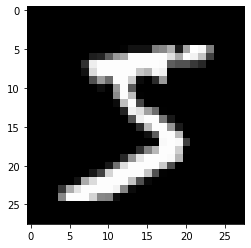

In [11]:
plt.imshow(train_data[0][0][0], cmap = "gray")

# Create The Model

In [12]:
def create_lenet():
    model = nn.Sequential(
        
    nn.Conv2d(1, 6, 5, padding = 2),
    nn.ReLU(),
    nn.AvgPool2d(2, stride = 2),
    
    nn.Conv2d(6, 16, 5, padding = 0),
    nn.ReLU(),
    nn.AvgPool2d(2, stride = 2), 
    
    nn.Flatten(),
    nn.Linear(400, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10)
)
    return model

# Validate The Model

In [13]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        x = model(images)
        value, pred = torch.max(x, 1)
        total += x.size(0)
        correct += torch.sum(pred == labels)
    
    return correct*100./total

# Training Function

In [14]:
def train(lr, epochs, device = "cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr = lr)
    max_accuracy = 0
    
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_dl):
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, test_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy 
            print("Saving Best Model With Accuracy: ", accuracy)
        print("Epoch: ", epoch+1, "Accuracy: ", accuracy, "%")
    #plt.plot(accuracies)
    return best_model, accuracies, lr

# Training The Model: Good Learning Rates

In [15]:
lenet = train(0.001, 10)

Saving Best Model With Accuracy:  96.91999816894531
Epoch:  1 Accuracy:  96.91999816894531 %
Saving Best Model With Accuracy:  98.16999816894531
Epoch:  2 Accuracy:  98.16999816894531 %
Saving Best Model With Accuracy:  98.61000061035156
Epoch:  3 Accuracy:  98.61000061035156 %
Epoch:  4 Accuracy:  98.5 %
Epoch:  5 Accuracy:  98.44999694824219 %
Epoch:  6 Accuracy:  98.54000091552734 %
Epoch:  7 Accuracy:  98.41999816894531 %
Epoch:  8 Accuracy:  98.58000183105469 %
Epoch:  9 Accuracy:  98.58999633789062 %
Saving Best Model With Accuracy:  98.72000122070312
Epoch:  10 Accuracy:  98.72000122070312 %


In [16]:
print("Highest Accuracy for Lenet: ", max(lenet[1]), " with learning rate: ", lenet[2])


Highest Accuracy for Lenet:  98.72000122070312  with learning rate:  0.001


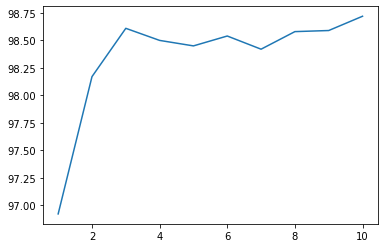

In [17]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, lenet[1])

In [18]:
def predict_dl(model, data):
    y_pred = []
    y_true = []
    for i, (images, labels) in enumerate(data):
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)

In [19]:
y_pred, y_true = predict_dl(lenet[0], test_dl)

In [20]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels = np.arange(0, 10)))

,0,1,2,3,4,5,6,7,8,9
0,974,0,2,0,0,0,1,0,2,1
1,0,1128,1,0,4,0,0,1,1,0
2,1,1,1021,0,1,0,0,8,0,0
3,0,0,4,993,0,5,0,5,3,0
4,0,0,0,0,978,0,0,0,1,3
5,1,0,1,8,0,873,2,0,1,6
6,3,5,1,0,4,4,938,0,2,1
7,0,2,4,0,1,0,0,1019,1,1
8,2,0,5,2,1,2,0,1,960,1
9,0,1,0,1,17,0,0,1,1,988
